In [8]:
import jet
import numpy as np
import pennylane as qml

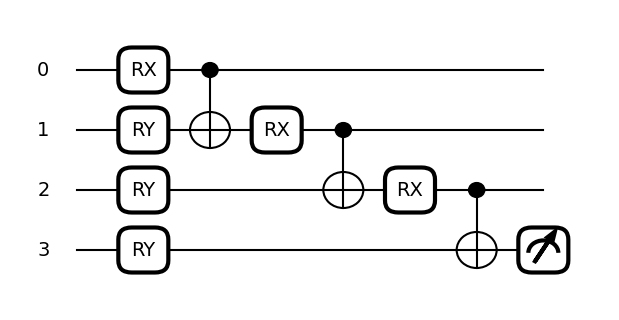

In [9]:
def block(weights, wires):
    qml.RX(weights[0], wires=wires[0])
    qml.RY(weights[1], wires=wires[1])
    qml.CNOT(wires=wires)
    
dev = qml.device("default.qubit", wires=4)
@qml.qnode(dev)
def circuit(template_weights):
    qml.MPS(
        wires=range(4),
        n_block_wires=2,
        block=block,
        n_params_block=2,
        template_weights=template_weights,
    )
    return qml.expval(qml.PauliZ(wires=3))


np.random.seed(1)
weights = np.random.random(size=[3, 2])
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(weights)
fig.set_size_inches((6, 3))

In [13]:
help(op)

Help on ExpectationMP in module pennylane.measurements.expval object:

class ExpectationMP(pennylane.measurements.measurements.SampleMeasurement, pennylane.measurements.measurements.StateMeasurement)
 |  ExpectationMP(obs: Optional[pennylane.operation.Operator] = None, wires: Optional[pennylane.wires.Wires] = None, eigvals: Optional[pennylane.TensorLike] = None, id: Optional[str] = None)
 |  
 |  Measurement process that computes the expectation value of the supplied observable.
 |  
 |  Please refer to :func:`expval` for detailed documentation.
 |  
 |  Args:
 |      obs (Union[.Operator, .MeasurementValue]): The observable that is to be measured
 |          as part of the measurement process. Not all measurement processes require observables
 |          (for example ``Probability``); this argument is optional.
 |      wires (.Wires): The wires the measurement process applies to.
 |          This can only be specified if an observable was not provided.
 |      eigvals (array): A flat 

In [17]:
op.parameters

[]

In [22]:
with qml.tape.QuantumTape() as tape:
    qml.RX(0.432, wires=0)
    qml.RY(0.543, wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RX(0.133, wires=1)
    qml.expval(qml.PauliZ(wires=[0]))

for op in tape:
    print(op)
    print(op.compute_matrix(*op.parameters))
    print('--')

RX(0.432, wires=[0])
[[0.97676256+0.j        0.        -0.2143243j]
 [0.        -0.2143243j 0.97676256+0.j       ]]
--
RY(0.543, wires=[0])
[[ 0.96336972+0.j -0.26817679-0.j]
 [ 0.26817679+0.j  0.96336972+0.j]]
--
CNOT(wires=[0, 1])
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]
--
RX(0.133, wires=[1])
[[0.99778969+0.j       0.        -0.066451j]
 [0.        -0.066451j 0.99778969+0.j      ]]
--
expval(PauliZ(wires=[0]))


AttributeError: 'ExpectationMP' object has no attribute 'compute_matrix'

In [7]:
q0 = jet.Tensor(["i0"], [2], [1, 0])
q1 = jet.Tensor(["i1"], [2], [1, 0])

inv_sqrt_2 = 2 ** -0.5
H = jet.Tensor(["i0", "k"], [2, 2], np.array([inv_sqrt_2, inv_sqrt_2, inv_sqrt_2, -inv_sqrt_2]))

CNOT = jet.Tensor(["k", "i1", "m", "n"], [2, 2, 2, 2])
CNOT.set_value([0, 0, 0, 0], 1)
CNOT.set_value([0, 1, 0, 1], 1)
CNOT.set_value([1, 0, 1, 1], 1)
CNOT.set_value([1, 1, 1, 0], 1)

tn = jet.TensorNetwork()
tn.add_tensor(q0)
tn.add_tensor(q1)
tn.add_tensor(H)
tn.add_tensor(CNOT)

result = tn.contract()
print("Amplitude |00> =", result.get_value([0, 0]))
print("Amplitude |01> =", result.get_value([0, 1]))
print("Amplitude |10> =", result.get_value([1, 0]))
print("Amplitude |11> =", result.get_value([1, 1]))

Amplitude |00> = (0.7071067811865476+0j)
Amplitude |01> = 0j
Amplitude |10> = 0j
Amplitude |11> = (0.7071067811865476+0j)
